In [1]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.spatial import distance
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance


In [2]:
!pip install seaborn
import seaborn as sns

You should consider upgrading via the '/Users/luna/anaconda3/bin/python -m pip install --upgrade pip' command.


### This notebook has 3 parts. 
---Hungary
### 1. Part one - policies
    1.1 Reading in the policy data of countries
    1.2 Extracting policy scores
    1.3 Preparing policy data frame
    1.4 Independent variable
    1.5 Statistics of policies
    1.6 Sub-indicators
### 2. Part two   - editorials 
    2.1 Reading in the editorship data
    2.2 Preparing editorship data for 2020
    2.3 Daily ratios 2020
    2.4 Preparing editorship data for 2019

### 3. Part three -  Experiments
    3.1 Weekly normalizated data
    3.2 Weekly and yearly normalized data
    3.3 Outlier detection and removal
        3.3.1 Outlier detection & removal for 2019 [ for weekly normalized data ]
        3.3.2 Outlier detection & removal for 2019 [ for weekly&yearly normalized data ]
    3.4 Moving average smoothing 2019/2020 
    3.5 Feature selection - dimensionality reduction
       3.5.1 Correlation heatmap
           Jensen shanon
           Earthmover
       3.5.2 PCA
           3.5.2.1 pca - built in library
           3.5.2.2 pca manually


### 4. Results
    4.1 Metrics/Correlation comparisons 

    





# Part one

### 1.1 Reading in the policy data of countries

In [3]:


c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)



c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)



c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)


number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)


In [4]:
#let's print out one of the 8 above dataframes

c8_internationaltravel.head(10)

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARE,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARG,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN
7,AUS,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
8,AUT,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,AZE,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN


In [5]:

"merging all the above 8 dataframes into 1"

frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]

result = pd.concat(frames, axis=0) #default axis is 0

print( result.shape)

(1488, 564)


In [6]:
# here we will have all 8 indicators of all countries at one place in the result dataframe
result.head()

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Extracting policy scores of Germany, Hungary, italy, Poland and Sweden

In [7]:
#extracting restrinction policy scores of 8 policies for 5 different countries seperateöy
#de, hu, it, pl, se  

deutch_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('Hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]


#reseting index & taking away the extra index column
deutch_policy.reset_index(inplace=True)
del deutch_policy['index']
print("number of policies & number of days is", deutch_policy.shape[0],",", deutch_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']



number of policies & number of days is 8 , 562


In [8]:
#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )
# suming previous rows to get the total daily policy score 

deutch_policy.loc["Daily_Sum"] = deutch_policy.sum()
hungary_policy.loc["Daily_Sum"] = hungary_policy.sum()
italy_policy.loc["Daily_Sum"] = italy_policy.sum()
poland_policy.loc["Daily_Sum"] = poland_policy.sum()
sweden_policy.loc["Daily_Sum"] =sweden_policy.sum()



/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
#inspect deutch dataframe
deutch_policy.head(10)

#The last row is the sum of all the above rows called "Daily_Sum"

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
3,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
4,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Daily_Sum,DEUDEUDEUDEUDEUDEUDEUDEU,GermanyGermanyGermanyGermanyGermanyGermanyGerm...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,0.0,0.0


### 1.3 Preparing policy dataframe of  Hungary

In [10]:

#extract the Hungary policy column 
#Transpose so that we get the total sum as a column at the end 

hungary_policy_transposed =hungary_policy.T 
hungary_policy_transposed.reset_index(inplace=True)

hungary_policy_transposed = hungary_policy_transposed.drop(labels=0, axis=0)
hungary_policy_transposed.rename(columns=hungary_policy_transposed.iloc[0])
hungary_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
1,country_name,Hungary,Hungary,Hungary,Hungary,Hungary,Hungary,Hungary,Hungary,HungaryHungaryHungaryHungaryHungaryHungaryHung...
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0


In [11]:
#drop the first row
hungary_policy_transposed=hungary_policy_transposed.iloc[1:,:]
hungary_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0
6,05Jan2020,0,0,0,0,0,0,0,0,0


In [12]:
print(hungary_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  0  0  0  0  0  0  0  0         0
63  02Mar2020  0  0  0  0  0  0  0  0         0
64  03Mar2020  0  0  0  0  0  0  0  0         0
65  04Mar2020  0  0  0  0  0  0  0  0         0
66  05Mar2020  0  0  0  0  0  0  0  0         0


In [13]:
hungary_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      562 non-null    object
 1   0          559 non-null    object
 2   1          559 non-null    object
 3   2          559 non-null    object
 4   3          559 non-null    object
 5   4          559 non-null    object
 6   5          559 non-null    object
 7   6          559 non-null    object
 8   7          559 non-null    object
 9   Daily_Sum  562 non-null    object
dtypes: object(10)
memory usage: 48.3+ KB


In [14]:
hungary_policy_transposed.iloc[:,1] = hungary_policy_transposed.iloc[:,1].astype(str).astype(float)
hungary_policy_transposed.iloc[:,2] = hungary_policy_transposed.iloc[:,2].astype(str).astype(float)
hungary_policy_transposed.iloc[:,3] = hungary_policy_transposed.iloc[:,3].astype(str).astype(float)
hungary_policy_transposed.iloc[:,4] = hungary_policy_transposed.iloc[:,4].astype(str).astype(float)
hungary_policy_transposed.iloc[:,5] = hungary_policy_transposed.iloc[:,5].astype(str).astype(float)
hungary_policy_transposed.iloc[:,6] = hungary_policy_transposed.iloc[:,6].astype(str).astype(float)
hungary_policy_transposed.iloc[:,7] = hungary_policy_transposed.iloc[:,7].astype(str).astype(float)
hungary_policy_transposed.iloc[:,8] = hungary_policy_transposed.iloc[:,8].astype(str).astype(float)
hungary_policy_transposed.iloc[:,9] = hungary_policy_transposed.iloc[:,9].astype(str).astype(float)

hungary_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      562 non-null    object 
 1   0          559 non-null    float64
 2   1          559 non-null    float64
 3   2          559 non-null    float64
 4   3          559 non-null    float64
 5   4          559 non-null    float64
 6   5          559 non-null    float64
 7   6          559 non-null    float64
 8   7          559 non-null    float64
 9   Daily_Sum  562 non-null    float64
dtypes: float64(9), object(1)
memory usage: 48.3+ KB


In [15]:
# rename the "index column" to "Date" and change it from string to datetime

hungary_policy_transposed.columns
#hungary_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']

hungary_policy_transposed.columns=['Date', 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum']


hungary_policy_transposed['Date']=pd.to_datetime(hungary_policy_transposed['Date'])

hungary_policy_transposed.head()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.4 Independent variable for Hungary = weekely policy average

In [16]:

#extract the week number (of the year) and add it as a new column at the end

hungary_policy_transposed['week_of_year']= hungary_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
hungary_policy_transposed.head(10)

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [17]:
# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

hungary_policy_transposed_FirstLastWeekDropped=hungary_policy_transposed.loc[( (hungary_policy_transposed['Date'] < '2021-01-01 00:00:00') & (hungary_policy_transposed['week_of_year']< 52) & (1<hungary_policy_transposed['week_of_year']))]

#head
hungary_policy_transposed_FirstLastWeekDropped.head()


,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [18]:
#tail
hungary_policy_transposed_FirstLastWeekDropped.tail()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
352,2020-12-16,2.0,2.0,2.0,4.0,1.0,2.0,0.0,4.0,17.0,51
353,2020-12-17,2.0,2.0,2.0,4.0,1.0,2.0,0.0,4.0,17.0,51
354,2020-12-18,2.0,2.0,2.0,4.0,1.0,2.0,0.0,4.0,17.0,51
355,2020-12-19,2.0,2.0,2.0,4.0,1.0,2.0,0.0,4.0,17.0,51
356,2020-12-20,2.0,2.0,2.0,4.0,1.0,2.0,0.0,4.0,17.0,51


##  1.5 Statistics of policies for Hungary

In [19]:
hungary_policy_transposed_FirstLastWeekDropped.describe()

,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,1.651429,1.208571,1.217143,1.577143,0.560000,0.934286,0.631429,2.917143,10.697143,26.500000
std,1.023330,0.752787,0.736866,1.149831,0.497098,0.789415,0.667404,1.440906,5.727303,14.451529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,9.000000,14.000000
50%,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,12.000000,26.500000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,15.000000,39.000000
max,3.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,4.000000,17.000000,51.000000


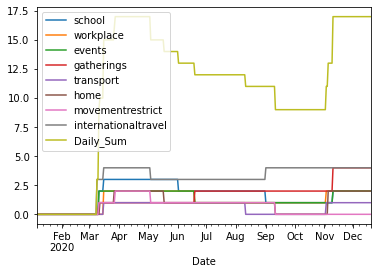

In [20]:
hungary_policy_transposed_FirstLastWeekDropped.plot(x="Date", y=[ 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum'])
plt.show()

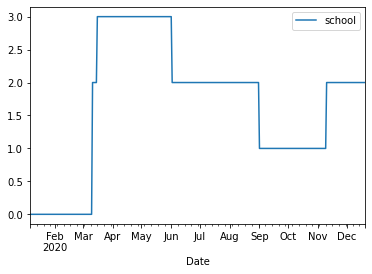

In [21]:
df1 = hungary_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df1.plot(x="Date", y="school")
plt.show()

Daily policy fluctuations Hungary


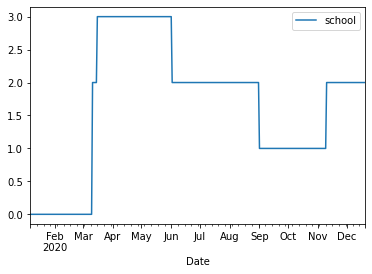

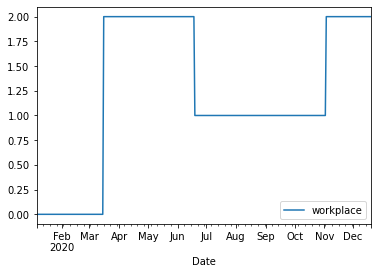

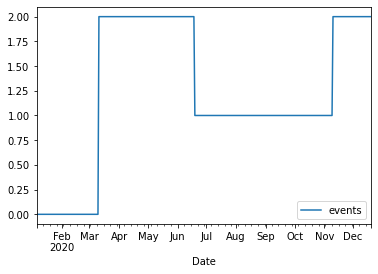

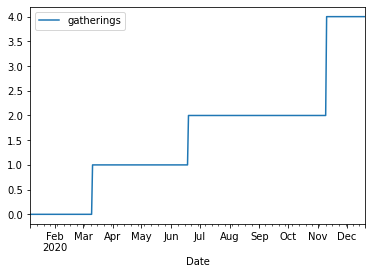

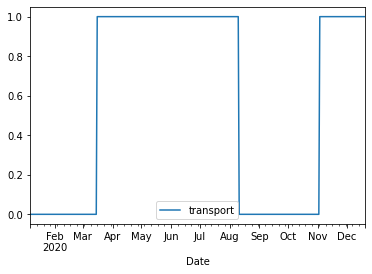

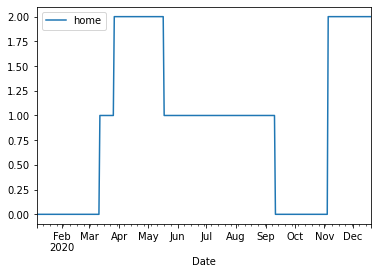

In [22]:
df1 = hungary_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df2 = hungary_policy_transposed_FirstLastWeekDropped[["Date", "workplace"]]
df3 = hungary_policy_transposed_FirstLastWeekDropped[["Date", "events"]]
df4 = hungary_policy_transposed_FirstLastWeekDropped[["Date", "gatherings"]]
df5 = hungary_policy_transposed_FirstLastWeekDropped[["Date", "transport"]]
df6 = hungary_policy_transposed_FirstLastWeekDropped[["Date", "home"]]
df7 = hungary_policy_transposed_FirstLastWeekDropped[["Date", "movementrestrict"]]
df8 = hungary_policy_transposed_FirstLastWeekDropped[["Date", "internationaltravel"]]


#define number of rows and columns for subplots
nrow=3
ncol=2

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8]
#fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range( ncol):
        yi=df_list[count].columns[1]
        df_list[count].plot(x="Date", y=yi)

        count+=1
print("Daily policy fluctuations Hungary")       
plt.show()

In [23]:
#hungary_policy_transposed_FirstLastWeekDropped.hist(figsize=(20,15))
#plt.show()

In [24]:
#extract only the two columns of daily_sum and week_of year
policy_2020_total_hungary=hungary_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
print(policy_2020_total_hungary.iloc[47:70,:])

    Daily_Sum  week_of_year
54        0.0             8
55        0.0             8
56        0.0             9
57        0.0             9
58        0.0             9
59        0.0             9
60        0.0             9
61        0.0             9
62        0.0             9
63        0.0            10
64        0.0            10
65        0.0            10
66        0.0            10
67        0.0            10
68        0.0            10
69        0.0            10
70        3.0            11
71        3.0            11
72        9.0            11
73       10.0            11
74       10.0            11
75       10.0            11
76       10.0            11


In [25]:
# 7 days 50 weeks = 350 data points
policy_2020_total_hungary.shape

(350, 2)

## Group the daily sum by week

In [26]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_hungary=policy_2020_total_hungary.groupby(['week_of_year']).sum()
weekly_policy_2020_hungary.columns=["Weekly_sum"] 

In [27]:
weekly_policy_2020_hungary.head(10)

,Weekly_sum
week_of_year,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
10,0.0


In [28]:
print(weekly_policy_2020_hungary.iloc[:18, :])

              Weekly_sum
week_of_year            
2                    0.0
3                    0.0
4                    0.0
5                    0.0
6                    0.0
7                    0.0
8                    0.0
9                    0.0
10                   0.0
11                  55.0
12                 105.0
13                 110.0
14                 119.0
15                 119.0
16                 119.0
17                 119.0
18                 119.0
19                 105.0


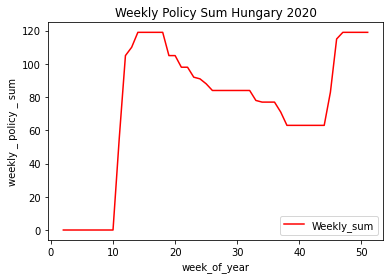

In [29]:
ax = plt.gca()
weekly_policy_2020_hungary.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Policy Sum Hungary 2020')
plt.ylabel('weekly _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

## Normalize weekly sums 

In [30]:
#average weekly independent variable 
weekly_ratio_policy_2020_hungary=weekly_policy_2020_hungary/7
weekly_ratio_policy_2020_hungary.head(10)

,Weekly_sum
week_of_year,
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000
10,0.000000


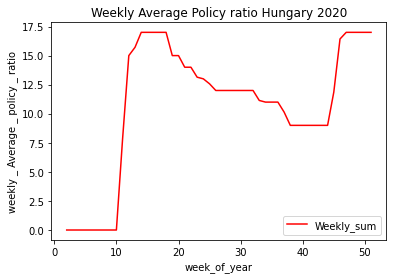

In [31]:
ax = plt.gca()
weekly_ratio_policy_2020_hungary.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Average Policy ratio Hungary 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

In [32]:
#the final independent variable in list form 
weekly_ratio_policy_2020_hungary=weekly_ratio_policy_2020_hungary['Weekly_sum'].tolist()
print(weekly_ratio_policy_2020_hungary[:14])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.857142857142857, 15.0, 15.714285714285714, 17.0, 17.0]


## 1.6 Sub- indicators
### Let's break down the total policy sum into sub policy indicators: define  sub features of IV

In [33]:
#extract only the two columns of daily_sum and week_of year
policy_2020_indicators_hungary=hungary_policy_transposed_FirstLastWeekDropped.iloc[:, 1:11]
print(policy_2020_indicators_hungary.iloc[70:90,:])

    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
78     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
79     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
80     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
81     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
82     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
83     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
84     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
85     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
86     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
87     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
88     3.0        2.0     2.0         1.

### We keep all the sub indicators  for Hungary

In [34]:
#extract only the two columns of daily_sum and week_of year

#policy_2020_indicators_hungary.drop('transport', inplace=True, axis=1)
print(policy_2020_indicators_hungary.iloc[70:90,:])


    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
78     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
79     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
80     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
81     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
82     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
83     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
84     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
85     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
86     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
87     3.0        2.0     2.0         1.0        1.0   1.0               1.0   
88     3.0        2.0     2.0         1.

In [35]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_hungary_indicators=policy_2020_indicators_hungary.groupby(['week_of_year']).sum()
weekly_policy_2020_hungary_indicators.columns=["weekly_school", "weekly_workplace", "weekly_events","weekly_gatherings"
                                             ,"weekly_transportation","weekly_home", "weekly_movement", "weekly_travel", "weekly_sum"] 
print(weekly_policy_2020_hungary_indicators.iloc[45:50, :])


              weekly_school  weekly_workplace  weekly_events  \
week_of_year                                                   
47                     14.0              14.0           14.0   
48                     14.0              14.0           14.0   
49                     14.0              14.0           14.0   
50                     14.0              14.0           14.0   
51                     14.0              14.0           14.0   

              weekly_gatherings  weekly_transportation  weekly_home  \
week_of_year                                                          
47                         28.0                    7.0         14.0   
48                         28.0                    7.0         14.0   
49                         28.0                    7.0         14.0   
50                         28.0                    7.0         14.0   
51                         28.0                    7.0         14.0   

              weekly_movement  weekly_travel  weekly_

### Now we have weekly average of every single indicator (except transporation which was dropped)

In [36]:
#average weekly independent variable 
weekly_policy_2020_hungary_indicators_ratio=weekly_policy_2020_hungary_indicators/7
weekly_policy_2020_hungary_indicators_ratio.head(10)

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum
week_of_year,,,,,,,,,
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
5,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
6,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
7,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
8,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
9,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
10,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


# Part two

## 2.1  Reading in the editorship data


In [37]:

#Reading in the editorship data of the 5 countries


from datetime import datetime
import datetime
import sys
sys.path.insert(1, "../src")



revs_deutch = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/sewiki.csv")

print(revs_deutch.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [38]:
#test #get week number
datetime.date(2010, 6, 16).weekday()


2

In [39]:
#test #get hour number
datetime.datetime(2017, 11, 28, 23, 55, 59, 342380).hour


23

In [40]:
revs_hungary.head()

,y,m,d,h,c
0,2018,1,1,0,305
1,2018,1,1,1,36
2,2018,1,1,2,27
3,2018,1,1,3,49
4,2018,1,1,4,35


In [41]:

#making up the datetime structure 
revs_hungary['dateInt']=revs_hungary['y'].astype(str) + revs_hungary['m'].astype(str).str.zfill(2)+ revs_hungary['d'].astype(str).str.zfill(2)
revs_hungary['Date'] = pd.to_datetime(revs_hungary['dateInt'], format='%Y%m%d')      
revs_hungary = revs_hungary.reset_index()
revs_hungary.head()

,index,y,m,d,h,c,dateInt,Date
0,0,2018,1,1,0,305,20180101,2018-01-01
1,1,2018,1,1,1,36,20180101,2018-01-01
2,2,2018,1,1,2,27,20180101,2018-01-01
3,3,2018,1,1,3,49,20180101,2018-01-01
4,4,2018,1,1,4,35,20180101,2018-01-01


In [42]:
print(revs_hungary.iloc[50:55, :])

    index     y  m  d  h   c   dateInt       Date
50     50  2018  1  3  2   6  20180103 2018-01-03
51     51  2018  1  3  3  17  20180103 2018-01-03
52     52  2018  1  3  4  11  20180103 2018-01-03
53     53  2018  1  3  5  32  20180103 2018-01-03
54     54  2018  1  3  6  36  20180103 2018-01-03


In [43]:

#extract the week number and add it as a new column
revs_hungary['week_of_year']= revs_hungary['Date'].apply(lambda x: x.isocalendar()[1])

#extract the hour of the week
#revs_hungary['hour_of_week']=revs_hungary['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_hungary['hour_of_week']=revs_hungary['Date'].apply(lambda x: 24*x.weekday()) + revs_hungary['h']


#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
revs_hungary.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
0,0,2018,1,1,0,305,20180101,2018-01-01,1,0
1,1,2018,1,1,1,36,20180101,2018-01-01,1,1
2,2,2018,1,1,2,27,20180101,2018-01-01,1,2
3,3,2018,1,1,3,49,20180101,2018-01-01,1,3
4,4,2018,1,1,4,35,20180101,2018-01-01,1,4
5,5,2018,1,1,5,7,20180101,2018-01-01,1,5
6,6,2018,1,1,6,23,20180101,2018-01-01,1,6
7,7,2018,1,1,7,67,20180101,2018-01-01,1,7
8,8,2018,1,1,8,65,20180101,2018-01-01,1,8
9,9,2018,1,1,9,134,20180101,2018-01-01,1,9


### 2.2 Prepare editorship data Hungary for 2020

In [44]:
#We get all data which is from 2020 and  where  1< week_of_year <52 
revs_hungary_2020=revs_hungary.loc[(revs_hungary['Date'] >= '2020-01-01 00:00:00') & (revs_hungary['Date'] < '2021-01-01 00:00:00')& (revs_hungary['week_of_year'] < 52)& (1<revs_hungary['week_of_year'])]
revs_hungary_2020.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17636,17636,2020,1,6,0,77,20200106,2020-01-06,2,0
17637,17637,2020,1,6,1,69,20200106,2020-01-06,2,1
17638,17638,2020,1,6,2,45,20200106,2020-01-06,2,2
17639,17639,2020,1,6,3,52,20200106,2020-01-06,2,3
17640,17640,2020,1,6,4,46,20200106,2020-01-06,2,4
17641,17641,2020,1,6,5,50,20200106,2020-01-06,2,5
17642,17642,2020,1,6,6,48,20200106,2020-01-06,2,6
17643,17643,2020,1,6,7,148,20200106,2020-01-06,2,7
17644,17644,2020,1,6,8,142,20200106,2020-01-06,2,8
17645,17645,2020,1,6,9,158,20200106,2020-01-06,2,9


In [45]:
#tail
revs_hungary_2020.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
26029,26029,2020,12,20,19,199,20201220,2020-12-20,51,163
26030,26030,2020,12,20,20,277,20201220,2020-12-20,51,164
26031,26031,2020,12,20,21,211,20201220,2020-12-20,51,165
26032,26032,2020,12,20,22,96,20201220,2020-12-20,51,166
26033,26033,2020,12,20,23,96,20201220,2020-12-20,51,167


In [46]:

#group by 'week_of_year', 'hour_of_week' 

grouped_hungary_2020=revs_hungary_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_hungary_2020 = grouped_hungary_2020.reset_index()
grouped_hungary_2020.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,17636,2020,1,6,0,77
1,2,1,17637,2020,1,6,1,69
2,2,2,17638,2020,1,6,2,45
3,2,3,17639,2020,1,6,3,52
4,2,4,17640,2020,1,6,4,46
5,2,5,17641,2020,1,6,5,50
6,2,6,17642,2020,1,6,6,48
7,2,7,17643,2020,1,6,7,148
8,2,8,17644,2020,1,6,8,142
9,2,9,17645,2020,1,6,9,158


In [47]:
#tail
grouped_hungary_2020.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
8393,51,163,26029,2020,12,20,19,199
8394,51,164,26030,2020,12,20,20,277
8395,51,165,26031,2020,12,20,21,211
8396,51,166,26032,2020,12,20,22,96
8397,51,167,26033,2020,12,20,23,96


In [48]:

#populate the numpy array 

array_weekly_events_hungary_2020 = np.zeros((52,168))


for  i in range (grouped_hungary_2020.shape[0]):
    
    week=grouped_hungary_2020.iloc[i]['week_of_year']
    hour=grouped_hungary_2020.iloc[i]['hour_of_week']
    array_weekly_events_hungary_2020[week][hour]= grouped_hungary_2020.iloc[i]['c']



In [49]:
print(array_weekly_events_hungary_2020)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 77.  69.  45. ... 879. 334.  61.]
 ...
 [ 31.  29.  30. ... 166. 101.  45.]
 [ 27.  31.  37. ... 113. 104.  79.]
 [ 50.  28.  20. ... 211.  96.  96.]]


In [50]:
print(array_weekly_events_hungary_2020[3][:])

[ 66.  36.  33.  47.  11.  44.  60.  93. 161. 665. 723. 778. 777. 792.
 766. 723. 790. 549. 214. 173. 130. 110. 101.  58.  57.  42.  63.  59.
  38.  34.  45. 121.  81. 140. 142. 102. 123.  99. 103. 120. 105. 190.
 121. 114.  97.  96. 139. 150.  77.  35.   9.  40.  21.  25.  61. 107.
 160. 107. 117. 134. 103. 114. 209. 108. 107. 104.  94. 173. 132.  99.
  85.  81.  66.  38.  25.  11.  11.  45.  58. 252. 113.  95. 122.  97.
 119. 110.  95. 122.  98.  67. 127. 134. 166. 157.  81.  59.  22.  74.
  15.  10.  16.  41.  56. 141. 117. 114. 124. 130. 119.  90. 115. 122.
 195. 125. 129. 244. 141.  96.  86.  58.  48.  23.  20.  18.  14.  24.
  56.  99.  80. 197. 329. 187. 245. 188. 121.  96. 101. 175. 163. 177.
 147. 164.  88.  64.  50.  59.  57.  43.  16.  17.  54. 103. 127. 201.
 173. 192. 158. 159.  91. 130. 165. 187. 167. 170. 140.  99.  83.  70.]


In [51]:
#we need the weekly_sums to be able to devide the daily counts by this total weely sum
weekly_sum_hungary_2020=np.sum(array_weekly_events_hungary_2020 , axis=1)
print(weekly_sum_hungary_2020)

[    0.     0. 41115. 22766. 18353. 22512. 19667. 23058. 19143. 21943.
 18012. 17544. 21586. 20050. 28945. 53104. 22392. 29647. 27168. 21625.
 19922. 19979. 28014. 25398. 24318. 20269. 19929. 18766. 28190. 23066.
 20659. 17203. 19623. 15650. 18395. 17415. 20414. 17309. 16309. 17068.
 22328. 21319. 24382. 21394. 23702. 20855. 24907. 18308. 20483. 19338.
 20153. 18686.]


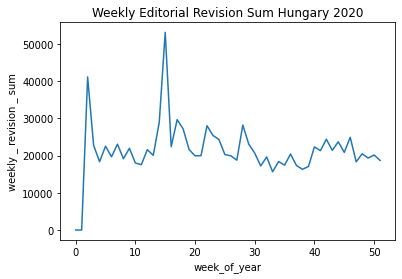

In [52]:
ax = plt.gca()

plt.plot(weekly_sum_hungary_2020) 
plt.title('Weekly Editorial Revision Sum Hungary 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [53]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2020_hungary=np.sum(weekly_sum_hungary_2020)
yearly_sum_2020_hungary

1112381.0

### 2.3  168 daily ratios for 2020 Hungary

In [54]:

array_weekly_ratios_hungary_2020=np.zeros((50,168))
    
for i in range (50):
    
    #becaue the first two rows of array_weekly_events_hungary_2020 
    #were all zeros( belonging to the 0th and 1st week) --> we move the indice by 2  -->so we skip the first two rows of the nummpy array
    
    array_weekly_ratios_hungary_2020[i]=array_weekly_events_hungary_2020[i+2]/weekly_sum_hungary_2020[i+2]

print(array_weekly_ratios_hungary_2020)

[[0.0018728  0.00167822 0.00109449 ... 0.02137906 0.00812356 0.00148364]
 [0.00289906 0.00158131 0.00144953 ... 0.00434859 0.00364579 0.00307476]
 [0.00174358 0.00163461 0.00152564 ... 0.01225958 0.00730126 0.00484934]
 ...
 [0.00160306 0.00149964 0.00155135 ... 0.00858413 0.00522288 0.00232702]
 [0.00133975 0.00153823 0.00183595 ... 0.00560711 0.00516052 0.00392001]
 [0.0026758  0.00149845 0.00107032 ... 0.01129188 0.00513754 0.00513754]]


In [55]:
print(array_weekly_ratios_hungary_2020[1][:])

[0.00289906 0.00158131 0.00144953 0.00206448 0.00048318 0.00193271
 0.00263551 0.00408504 0.00707195 0.02921023 0.03175788 0.03417377
 0.03412984 0.03478872 0.03364667 0.03175788 0.03470087 0.02411491
 0.00939998 0.00759905 0.00571027 0.00483177 0.00443644 0.00254766
 0.00250373 0.00184486 0.00276728 0.00259158 0.00166916 0.00149346
 0.00197663 0.00531494 0.00355794 0.00614952 0.00623737 0.00448037
 0.00540279 0.00434859 0.00452429 0.00527102 0.00461214 0.00834578
 0.00531494 0.00500747 0.00426074 0.00421681 0.0061056  0.00658877
 0.00338224 0.00153738 0.00039533 0.00175701 0.00092243 0.00109813
 0.00267943 0.00469999 0.00702802 0.00469999 0.00513924 0.00588597
 0.00452429 0.00500747 0.00918036 0.00474392 0.00469999 0.00456822
 0.00412896 0.00759905 0.00579812 0.00434859 0.00373364 0.00355794
 0.00289906 0.00166916 0.00109813 0.00048318 0.00048318 0.00197663
 0.00254766 0.01106914 0.00496354 0.00417289 0.00535887 0.00426074
 0.00522709 0.00483177 0.00417289 0.00535887 0.00430466 0.0029

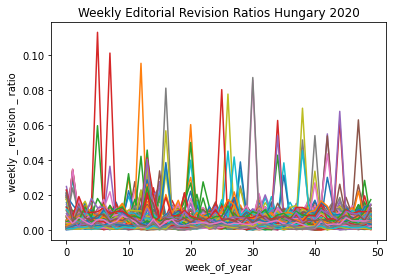

In [56]:
ax = plt.gca()

plt.plot(array_weekly_ratios_hungary_2020) 
plt.title('Weekly Editorial Revision Ratios Hungary 2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.show()

### 2.4 Prepare editorship data Hungary for 2019

In [57]:
#We get all data which is from 2019 and  where  1<week_of_year<52 

revs_hungary_2019=revs_hungary.loc[(revs_hungary['Date'] >= '2019-01-01 00:00:00') & (revs_hungary['Date'] < '2020-01-01 00:00:00') & (revs_hungary['week_of_year'] < 52)& (1<revs_hungary['week_of_year'])]
revs_hungary_2019.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
8901,8901,2019,1,7,0,62,20190107,2019-01-07,2,0
8902,8902,2019,1,7,1,35,20190107,2019-01-07,2,1
8903,8903,2019,1,7,2,13,20190107,2019-01-07,2,2
8904,8904,2019,1,7,3,8,20190107,2019-01-07,2,3
8905,8905,2019,1,7,4,35,20190107,2019-01-07,2,4
8906,8906,2019,1,7,5,22,20190107,2019-01-07,2,5
8907,8907,2019,1,7,6,40,20190107,2019-01-07,2,6
8908,8908,2019,1,7,7,70,20190107,2019-01-07,2,7
8909,8909,2019,1,7,8,82,20190107,2019-01-07,2,8
8910,8910,2019,1,7,9,124,20190107,2019-01-07,2,9


In [58]:
revs_hungary_2019.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17295,17295,2019,12,22,19,211,20191222,2019-12-22,51,163
17296,17296,2019,12,22,20,211,20191222,2019-12-22,51,164
17297,17297,2019,12,22,21,91,20191222,2019-12-22,51,165
17298,17298,2019,12,22,22,124,20191222,2019-12-22,51,166
17299,17299,2019,12,22,23,110,20191222,2019-12-22,51,167


In [59]:

grouped_hungary_2019=revs_hungary_2019.groupby(['week_of_year', 'hour_of_week']).sum()
grouped_hungary_2019 = grouped_hungary_2019.reset_index()
grouped_hungary_2019.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,8901,2019,1,7,0,62
1,2,1,8902,2019,1,7,1,35
2,2,2,8903,2019,1,7,2,13
3,2,3,8904,2019,1,7,3,8
4,2,4,8905,2019,1,7,4,35
5,2,5,8906,2019,1,7,5,22
6,2,6,8907,2019,1,7,6,40
7,2,7,8908,2019,1,7,7,70
8,2,8,8909,2019,1,7,8,82
9,2,9,8910,2019,1,7,9,124


In [60]:
grouped_hungary_2019.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
8394,51,163,17295,2019,12,22,19,211
8395,51,164,17296,2019,12,22,20,211
8396,51,165,17297,2019,12,22,21,91
8397,51,166,17298,2019,12,22,22,124
8398,51,167,17299,2019,12,22,23,110


In [61]:


array_weekly_events_hungary_2019 = np.zeros((52,168))



for  i in range (grouped_hungary_2019.shape[0]):
    
    week=grouped_hungary_2019.iloc[i]['week_of_year']
    hour=grouped_hungary_2019.iloc[i]['hour_of_week']
    array_weekly_events_hungary_2019[week][hour]= grouped_hungary_2019.iloc[i]['c']

print(array_weekly_events_hungary_2019)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 62.  35.  13. ... 138.  90.  71.]
 ...
 [ 32.  34.  48. ... 142. 122.  56.]
 [ 47.  29.  10. ... 164.  58.  41.]
 [ 87.  31.  18. ...  91. 124. 110.]]


In [62]:
print(array_weekly_events_hungary_2020[3][:])

[ 66.  36.  33.  47.  11.  44.  60.  93. 161. 665. 723. 778. 777. 792.
 766. 723. 790. 549. 214. 173. 130. 110. 101.  58.  57.  42.  63.  59.
  38.  34.  45. 121.  81. 140. 142. 102. 123.  99. 103. 120. 105. 190.
 121. 114.  97.  96. 139. 150.  77.  35.   9.  40.  21.  25.  61. 107.
 160. 107. 117. 134. 103. 114. 209. 108. 107. 104.  94. 173. 132.  99.
  85.  81.  66.  38.  25.  11.  11.  45.  58. 252. 113.  95. 122.  97.
 119. 110.  95. 122.  98.  67. 127. 134. 166. 157.  81.  59.  22.  74.
  15.  10.  16.  41.  56. 141. 117. 114. 124. 130. 119.  90. 115. 122.
 195. 125. 129. 244. 141.  96.  86.  58.  48.  23.  20.  18.  14.  24.
  56.  99.  80. 197. 329. 187. 245. 188. 121.  96. 101. 175. 163. 177.
 147. 164.  88.  64.  50.  59.  57.  43.  16.  17.  54. 103. 127. 201.
 173. 192. 158. 159.  91. 130. 165. 187. 167. 170. 140.  99.  83.  70.]


In [63]:
weekly_sum_hungary_2019=np.sum(array_weekly_events_hungary_2019 , axis=1)
print(weekly_sum_hungary_2019)

[    0.     0. 18103. 18565. 18370. 22217. 19400. 22608. 24925. 21579.
 17759. 18071. 17997. 23749. 19249. 21941. 20463. 59107. 25770. 22244.
 19763. 17577. 22037. 19330. 15612. 17181. 20730. 19801. 21356. 18273.
 17727. 17977. 14642. 16591. 16309. 19156. 18240. 18903. 23676. 25589.
 28383. 17870. 23775. 26967. 34851. 21052. 20587. 18592. 19396. 17320.
 20074. 18110.]


In [64]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2019_hungary=np.sum(weekly_sum_hungary_2019)
yearly_sum_2019_hungary

1059564.0

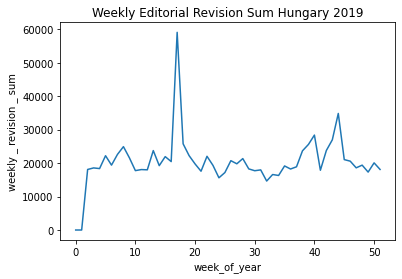

In [65]:
ax = plt.gca()

plt.plot(weekly_sum_hungary_2019) 
plt.title('Weekly Editorial Revision Sum Hungary 2019')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

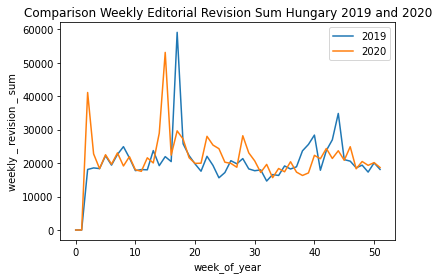

In [66]:

plt.plot(weekly_sum_hungary_2019, label= '2019') 
plt.plot(weekly_sum_hungary_2020, label= '2020') 

plt.title('Comparison Weekly Editorial Revision Sum Hungary 2019 and 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.legend()

plt.show()

# Part three: Experiments 



## 3.1 Weekly normalizated data

### Normalize by weekly sums

In [67]:

array_weekly_ratios_hungary_2019=np.zeros((50,168))
    
for i in range (50):
    
    
    array_weekly_ratios_hungary_2019[i]=array_weekly_events_hungary_2019[i+2]/weekly_sum_hungary_2019[i+2]

print(array_weekly_ratios_hungary_2019)

[[0.00342485 0.00193338 0.00071811 ... 0.00762305 0.00497155 0.003922  ]
 [0.00921088 0.00150821 0.00096957 ... 0.0096418  0.00635605 0.00527875]
 [0.00397387 0.00250408 0.00157866 ... 0.01017964 0.00391943 0.00451824]
 ...
 [0.00184758 0.00196305 0.00277136 ... 0.00819861 0.00704388 0.00323326]
 [0.00234134 0.00144465 0.00049816 ... 0.00816977 0.00288931 0.00204244]
 [0.00480398 0.00171176 0.00099393 ... 0.00502485 0.00684705 0.00607399]]


In [68]:
print(array_weekly_ratios_hungary_2019[1][:])

[0.00921088 0.00150821 0.00096957 0.00070024 0.00204686 0.00086184
 0.00215459 0.00226232 0.0047401  0.00942634 0.01088069 0.01007272
 0.00662537 0.01131161 0.00737948 0.01325074 0.01158093 0.00829518
 0.00646378 0.00985726 0.00770267 0.00716402 0.00377054 0.00312416
 0.00204686 0.00102343 0.00026932 0.0009157  0.00096957 0.00123889
 0.00301643 0.00323189 0.00360894 0.00527875 0.00694856 0.0056558
 0.00603286 0.01034204 0.00802586 0.00845677 0.00791813 0.00851064
 0.00587126 0.00840291 0.0094802  0.00791813 0.00608672 0.00301643
 0.00156208 0.00166981 0.00096957 0.00096957 0.00134662 0.00118503
 0.0047401  0.00339348 0.00834904 0.00678696 0.01028818 0.00651764
 0.003986   0.00328575 0.00700242 0.00700242 0.0076488  0.0096418
 0.00544034 0.00592513 0.00727175 0.00549421 0.00355508 0.00258551
 0.00210073 0.00113116 0.0009157  0.00032319 0.00048478 0.00075411
 0.00113116 0.00355508 0.00495556 0.00678696 0.00646378 0.00511716
 0.00500943 0.00592513 0.00845677 0.01082682 0.01044977 0.008456

No handles with labels found to put in legend.


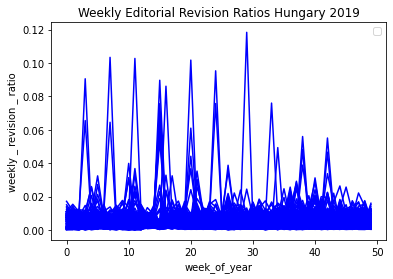

In [69]:
ax = plt.gca()
plt.plot(array_weekly_ratios_hungary_2019, color='blue') 



plt.title('Weekly Editorial Revision Ratios Hungary 2019')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.legend()

#plt.grid()
plt.show()

No handles with labels found to put in legend.


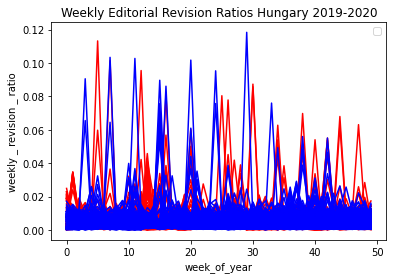

In [70]:
ax = plt.gca()
plt.plot(array_weekly_ratios_hungary_2020, color='red') 

plt.plot(array_weekly_ratios_hungary_2019, color='blue')




plt.title('Weekly Editorial Revision Ratios Hungary 2019-2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.legend()

#plt.grid()
plt.show()

### Let's instantiate a dictionary to keep the correlations after evey step

In [71]:
earth_correlations={ }
jensen_correlations={ }

### earthmover and jensenshanon plots

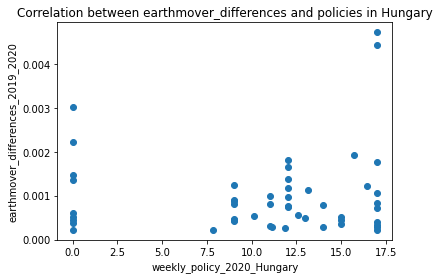

correlation and p_value are:  0.062341008556214106 0.6671325526085987


In [72]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_hungary_2019[i] and array_weekly_ratios_hungary_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_hungary_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_hungary_2019[i], array_weekly_ratios_hungary_2020[i]))




plt.scatter(weekly_ratio_policy_2020_hungary, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)

#save to dictionary

earth_correlations['normalizedweekly_earth']=corr


In [73]:
print(earth_correlations)

{'normalizedweekly_earth': 0.062341008556214106}


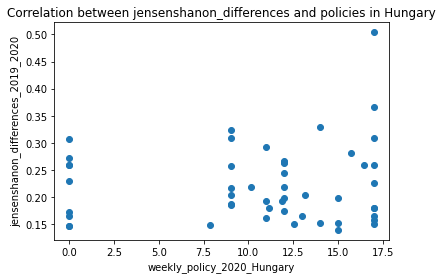

correlation and p_value are:  0.08922423710757918 0.5377730762192924


In [74]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_hungary_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_hungary_2019[i], array_weekly_ratios_hungary_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_hungary, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)

# save to dict

jensen_correlations['normalizedweekly_jensen']=corr


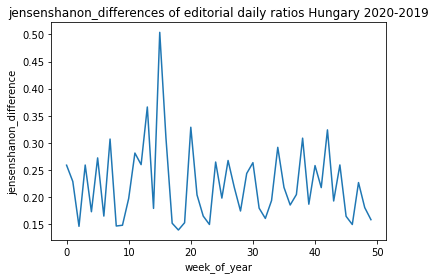

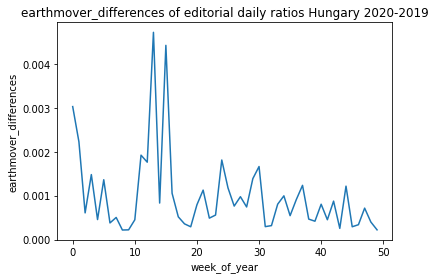

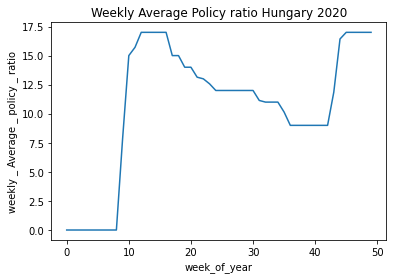

In [75]:

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_hungary)
plt.title('Weekly Average Policy ratio Hungary 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

## 3.2  Weekly and yearly normalized data
### Normalize 2020 and 2019 ratios by yearly sum as well (yearly and weekly nomalization)


In [76]:

array_weekly_ratios_hungary_2019_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    #array_weekly_ratios_hungary_2019_weeklyyearlynorm[i]=array_weekly_events_hungary_2019[i]/yearly_sum_2019_hungary

    array_weekly_ratios_hungary_2019_weeklyyearlynorm[i]=array_weekly_ratios_hungary_2019[i]/yearly_sum_2019_hungary

    
array_weekly_ratios_hungary_2020_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    #array_weekly_ratios_hungary_2020_weeklyyearlynorm[i]=array_weekly_events_hungary_2020[i]/yearly_sum_2020_hungary
    array_weekly_ratios_hungary_2020_weeklyyearlynorm[i]=array_weekly_ratios_hungary_2020[i]/yearly_sum_2020_hungary


print(array_weekly_ratios_hungary_2020_weeklyyearlynorm)



[[1.68359206e-09 1.50867340e-09 9.83917436e-10 ... 1.92191873e-08
  7.30285386e-09 1.33375475e-09]
 [2.60617540e-09 1.42155022e-09 1.30308770e-09 ... 3.90926311e-09
  3.27746301e-09 2.76412543e-09]
 [1.56743432e-09 1.46946967e-09 1.37150503e-09 ... 1.10210226e-08
  6.56363121e-09 4.35942670e-09]
 ...
 [1.44110815e-09 1.34813343e-09 1.39462079e-09 ... 7.71690173e-09
  4.69522334e-09 2.09193119e-09]
 [1.20439931e-09 1.38282883e-09 1.65047312e-09 ... 5.04063414e-09
  4.63916770e-09 3.52398316e-09]
 [2.40547085e-09 1.34706367e-09 9.62188338e-10 ... 1.01510870e-08
  4.61850402e-09 4.61850402e-09]]


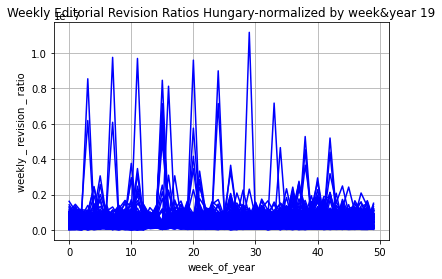

In [77]:
ax = plt.gca()

plt.plot(array_weekly_ratios_hungary_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week&year 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

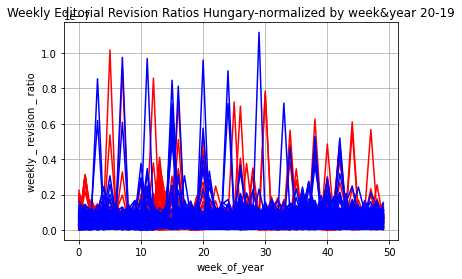

In [78]:
ax = plt.gca()

plt.plot(array_weekly_ratios_hungary_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_hungary_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

## Plot x and y after yearly normalization

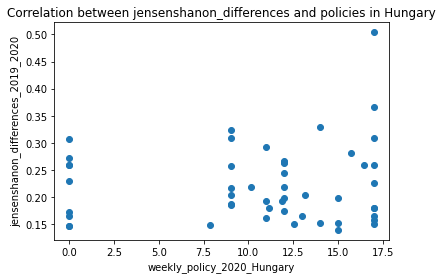

correlation and p_value are:  0.08922423710757911 0.5377730762192942


In [79]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_hungary_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_hungary_2019_weeklyyearlynorm[i], array_weekly_ratios_hungary_2020_weeklyyearlynorm[i]))
    

plt.scatter(weekly_ratio_policy_2020_hungary, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)
jensen_correlations['normalizedyearlyweekly_jensen']=corr


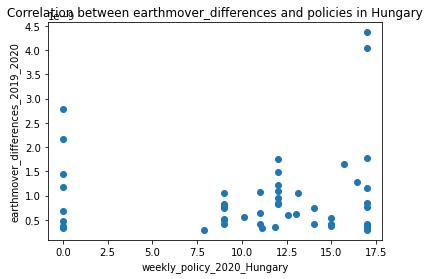

correlation and p_value are:  0.07822437215975088 0.5892189882537117


In [80]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_hungary_2019[i] and array_weekly_ratios_hungary_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_hungary_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_hungary_2019_weeklyyearlynorm[i], array_weekly_ratios_hungary_2020_weeklyyearlynorm[i]))



plt.scatter(weekly_ratio_policy_2020_hungary, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)

earth_correlations['normalizedyearlyweekly_earth']=corr


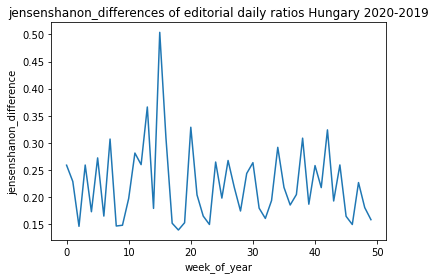

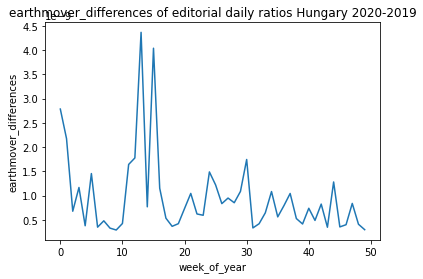

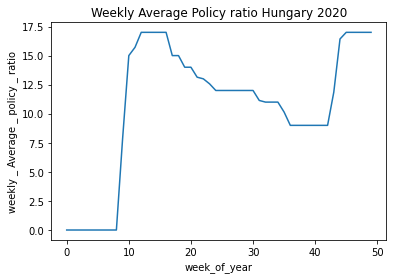

In [81]:




plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_hungary)
plt.title('Weekly Average Policy ratio Hungary 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()


## 3.3 Outlier detection
### let's first look at the 168 values from the week 20th

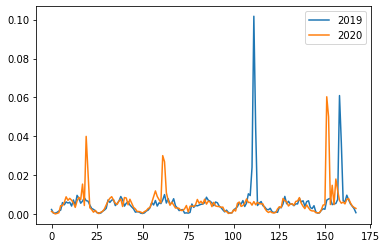

In [82]:
plt.plot(array_weekly_ratios_hungary_2019[20], label='2019' )

plt.plot(array_weekly_ratios_hungary_2020[20], label='2020' )

plt.legend()

plt.show()

In [83]:
print(earthmover_differences[20])

7.356483670758286e-10


## let's look at the 168 values from the week 11th

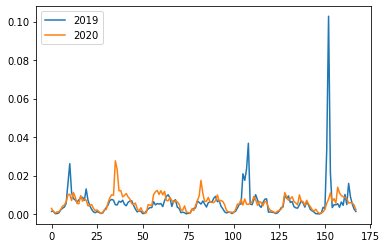

In [84]:
# Week 11 th 
plt.plot(array_weekly_ratios_hungary_2019[11],label='2019' )

plt.plot(array_weekly_ratios_hungary_2020[11], label='2020' )

plt.legend()

plt.show()

In [85]:
print(array_weekly_ratios_hungary_2019[11])

[0.00143164 0.00155796 0.00025264 0.00029475 0.00067371 0.00218957
 0.00307381 0.00366331 0.00555813 0.01579014 0.02623268 0.01120047
 0.00812666 0.00736873 0.00623184 0.00736873 0.00858984 0.00875826
 0.0071582  0.01309529 0.0072003  0.00433702 0.00252642 0.001179
 0.00075793 0.00134743 0.00092635 0.00037896 0.00054739 0.00206324
 0.00336856 0.00471599 0.00707398 0.00766348 0.00724241 0.00492652
 0.0047581  0.00673713 0.00618973 0.00724241 0.00513706 0.00437913
 0.00614763 0.00682134 0.00694766 0.00458967 0.00265274 0.001179
 0.00164217 0.00147375 0.00029475 0.00042107 0.00164217 0.00269485
 0.00341067 0.00341067 0.00648448 0.0048002  0.00551602 0.00522127
 0.00551602 0.00391595 0.00698977 0.00926355 0.01006358 0.00829509
 0.00400017 0.00677923 0.00749505 0.00362121 0.0029896  0.00075793
 0.00105268 0.00071582 0.00016843 0.00046318 0.00050528 0.00223167
 0.00303171 0.00320013 0.00677923 0.00610552 0.00522127 0.00682134
 0.00530549 0.00370542 0.00593709 0.00648448 0.00623184 0.00825298

## 3.3.1 Outlier detection & removal  for 2019 [ for weekly normalized data ]

Let's try first to remove one example: the largest 2019 jump which takes place a bit after the 10th week

In [86]:

# LET'S find the maximum value of the 11th array

print(np.max(array_weekly_ratios_hungary_2019[11]))

0.10274116804918101


In [87]:
# get index position of the above maximum value 

np.where(array_weekly_ratios_hungary_2019[11] == 0.10274116804918101)

(array([152]),)

In [88]:
#get the exact index
print(np.where(array_weekly_ratios_hungary_2019[11] == 0.10274116804918101)[0][0])

152


In [89]:
# let s see elements before and after the the outlier because we wanto susbsutitue the outlier by average of its before and after)
print(array_weekly_ratios_hungary_2019[11][90:94])

[0.00926355 0.00648448 0.00690555 0.00408438]


In [90]:

# see  the average of before and after the max element 
array_weekly_ratios_hungary_2019[11][92]=(array_weekly_ratios_hungary_2019[11][90]+array_weekly_ratios_hungary_2019[11][91])/2


print(array_weekly_ratios_hungary_2019[11][90:94])

[0.00926355 0.00648448 0.00787402 0.00408438]


## A

## Before outlier removal as we also looked at it above 

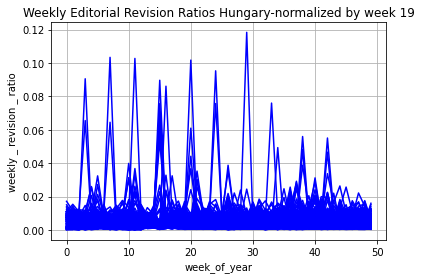

In [91]:
ax = plt.gca()

plt.plot(array_weekly_ratios_hungary_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

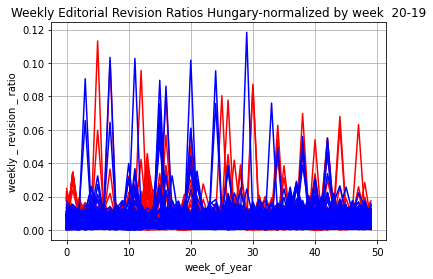

In [92]:
ax = plt.gca()

plt.plot(array_weekly_ratios_hungary_2020, color='red') 
plt.plot(array_weekly_ratios_hungary_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week  20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

In [93]:
array_weekly_ratios_hungary_2019.shape

(50, 168)

### remove outliers 10 times from every array in 50 weekly arrays for 2019 

In [94]:
#without_outlier_array_weekly_ratios_hungary_2019=np.zeros((50,168))

for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_hungary_2019[i])
        getindex=np.where(array_weekly_ratios_hungary_2019[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_hungary_2019[i][getindex]=(array_weekly_ratios_hungary_2019[i][getindex-1]+array_weekly_ratios_hungary_2019[i][getindex+1])/2
      

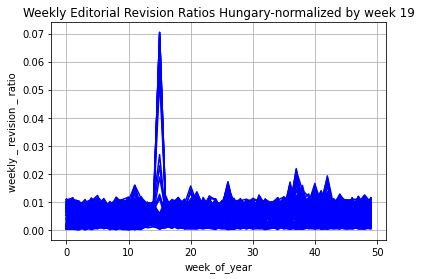

In [95]:
ax = plt.gca()
plt.plot(array_weekly_ratios_hungary_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

#  After outliers removed

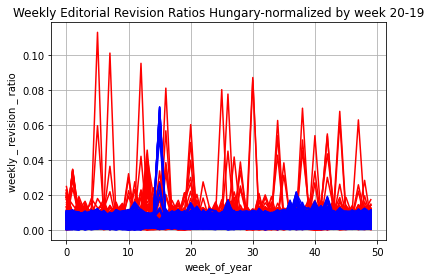

In [96]:
ax = plt.gca()
plt.plot(array_weekly_ratios_hungary_2020, color='red') 
plt.plot(array_weekly_ratios_hungary_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

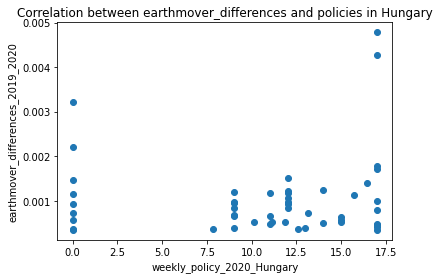

correlation and p_value are:  0.05789976445840286 0.6896034415433856


In [97]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_hungary_2019[i] and array_weekly_ratios_hungary_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_hungary_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_hungary_2019[i], array_weekly_ratios_hungary_2020[i]))




plt.scatter(weekly_ratio_policy_2020_hungary, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['without_outlier10_earth']=corr



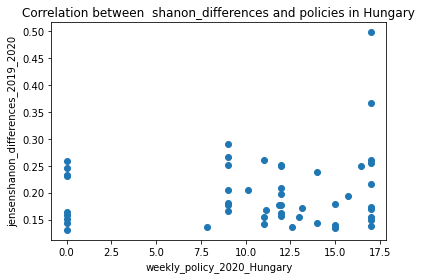

correlation and p_value are:  0.13500181228494235 0.34991664234911346


In [98]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_hungary_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_hungary_2019[i], array_weekly_ratios_hungary_2020[i]))
    
plt.scatter(weekly_ratio_policy_2020_hungary, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['without_outlier10_jensen']=corr



In [99]:
print(jensenshanon_differences)

[0.25866860909654643, 0.2321336153450562, 0.1426870744904547, 0.1586175702720561, 0.1502539573949044, 0.2452793307774393, 0.16363705371954224, 0.23057390520951287, 0.1305732115592421, 0.13533906757534425, 0.1783727031941108, 0.19472045520940007, 0.26129805586707594, 0.36642712690821844, 0.17402644502652598, 0.4983722486044487, 0.2553707259349472, 0.1406845126407567, 0.1337056022856593, 0.1437677458194314, 0.23860326023868117, 0.17227527190481012, 0.1554633515045885, 0.1369718243946378, 0.16222433721827778, 0.19746983556213185, 0.249539802744286, 0.20802348033560653, 0.17668523420501034, 0.1570726557847914, 0.25083927713469, 0.1673571811575954, 0.15562163248696212, 0.14216147149575667, 0.26078801588270706, 0.20493294868100503, 0.16680236365413975, 0.18065623756410062, 0.26557882897418683, 0.17669346686067355, 0.25125254619551923, 0.20454195811751036, 0.2902901432143825, 0.1766643533576624, 0.24892857563195464, 0.15431811682247232, 0.138551616761654, 0.21623505209286073, 0.17034908039691

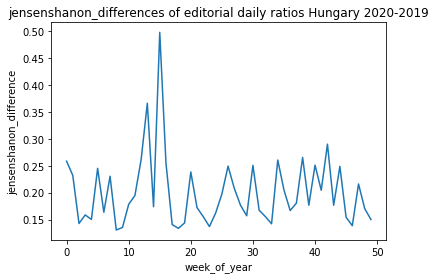

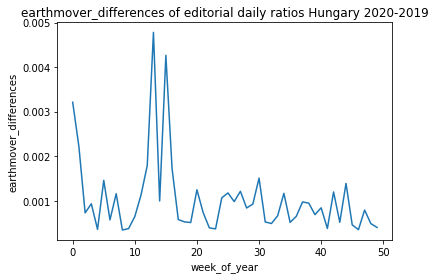

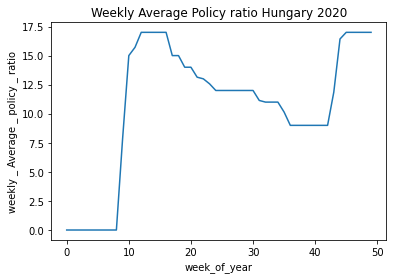

In [100]:


plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_hungary)
plt.title('Weekly Average Policy ratio Hungary 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

In [101]:
print(len(array_weekly_events_hungary_2019[2:]))

50


## 3.3.2 Outlier detection & removal  for 2019 [ for weekly&yearly normalized data ]



### Before outlier removed  : let's look at the original plot

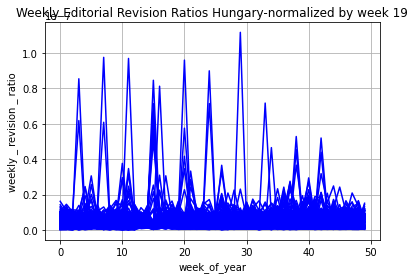

In [102]:
ax = plt.gca()

plt.plot(array_weekly_ratios_hungary_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

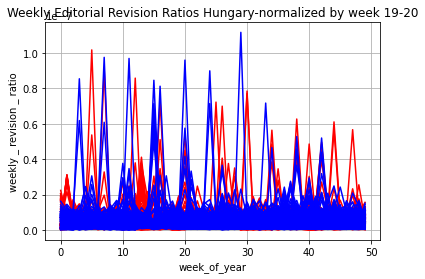

In [103]:
ax = plt.gca()

plt.plot(array_weekly_ratios_hungary_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_hungary_2019_weeklyyearlynorm, color='blue')


plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week 19-20')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()


### After outlier removal
### Let's remove the outliers from yearly_weekly_normalized data and find the correaltion again

In [104]:
#without_outlier_array_weekly_ratios_hungary_2019=np.zeros((50,168))



for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_hungary_2019_weeklyyearlynorm[i])
        getindex=np.where(array_weekly_ratios_hungary_2019_weeklyyearlynorm[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_hungary_2019_weeklyyearlynorm[i][getindex]=(array_weekly_ratios_hungary_2019_weeklyyearlynorm[i][getindex-1]+array_weekly_ratios_hungary_2019_weeklyyearlynorm[i][getindex+1])/2
      
   

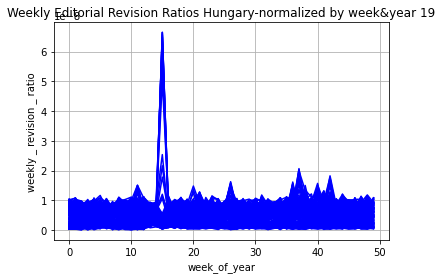

In [105]:
plt.plot(array_weekly_ratios_hungary_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week&year 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

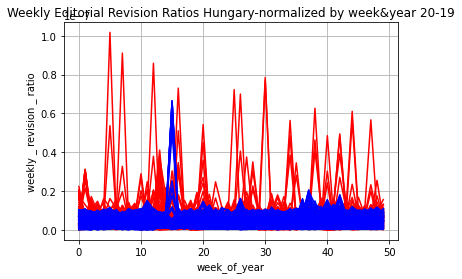

In [106]:
plt.plot(array_weekly_ratios_hungary_2020_weeklyyearlynorm, color='red')
plt.plot(array_weekly_ratios_hungary_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios Hungary-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

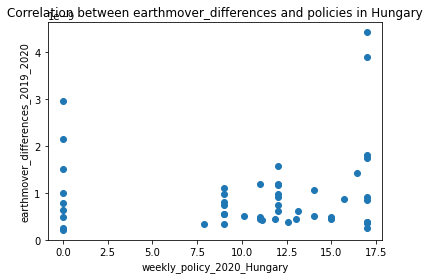

correlation and p_value are:  0.0652024995195063 0.6528047324276256


In [107]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_hungary_2019[i] and array_weekly_ratios_hungary_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_hungary_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_hungary_2019_weeklyyearlynorm[i], array_weekly_ratios_hungary_2020_weeklyyearlynorm[i]))


plt.scatter(weekly_ratio_policy_2020_hungary, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['normalizedyearlyweekly_without_outlier10_earth']=corr



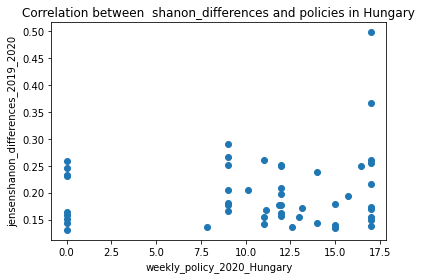

correlation and p_value are:  0.13496504886890207 0.3500490873445912


In [108]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_hungary_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_hungary_2019_weeklyyearlynorm[i], array_weekly_ratios_hungary_2020_weeklyyearlynorm[i]))
    
plt.scatter(weekly_ratio_policy_2020_hungary, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)
jensen_correlations['normalizedyearlyweekly_without_outlier10_jensen']=corr



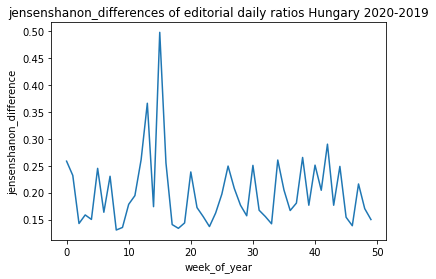

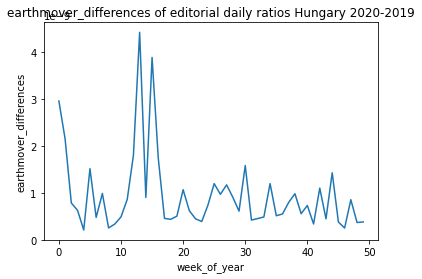

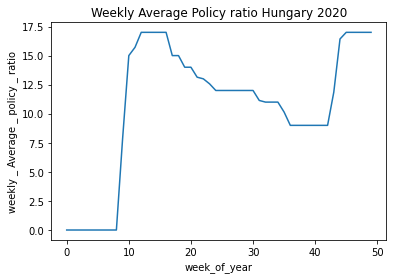

In [109]:


plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_hungary)
plt.title('Weekly Average Policy ratio Hungary 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

## 3.4  Smoothing 2019/2020 by moving average  
Test with window size 3 days

https://www.kite.com/python/answers/how-to-find-the-moving-average-of-a-list-in-python

### 2019

In [110]:
# We have 168 values - the window size is 72 = 3 days 
# --> each point in array of size 168 is replace by the average of 72 points around it

array_weekly_events_hungary_2019_50=array_weekly_events_hungary_2019[2:]


moving_average_weekly_ratios_hungary_2019=np.zeros((50,97))


for i in range (50):
            
        
    numbers = array_weekly_events_hungary_2019_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_hungary_2019_50[i][j : j + window_size]


            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_hungary_2019[i]= np.asarray(moving_averages)

        

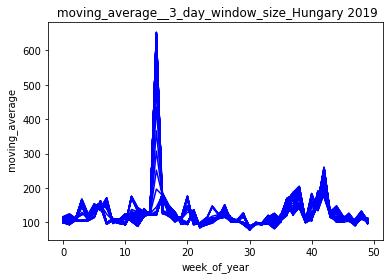

In [111]:
ax = plt.gca()
#plt.plot(array_weekly_events_hungary_2020_50) 
plt.plot( moving_average_weekly_ratios_hungary_2019, color='blue') 

plt.title(' moving_average__3_day_window_size_Hungary 2019')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

### 2020

In [112]:
# Moving average of 2020 -not ntcessary to smoothen 2020 so we dont run this cell

array_weekly_events_hungary_2020_50=array_weekly_events_hungary_2020[2:]

moving_average_weekly_ratios_hungary_2020=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_hungary_2020_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_hungary_2020_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_hungary_2020[i]= np.asarray(moving_averages)

         

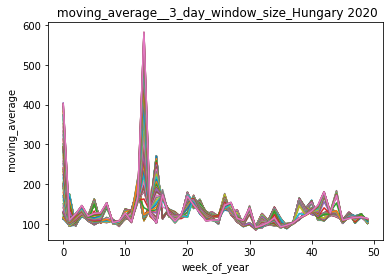

In [113]:
 
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_hungary_2020) 
plt.title(' moving_average__3_day_window_size_Hungary 2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()


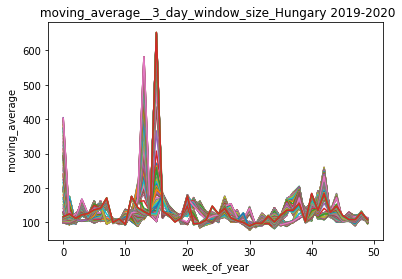

In [114]:

ax = plt.gca()
plt.plot( moving_average_weekly_ratios_hungary_2020) 
plt.plot( moving_average_weekly_ratios_hungary_2019) 

plt.title(' moving_average__3_day_window_size_Hungary 2019-2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')

plt.show()


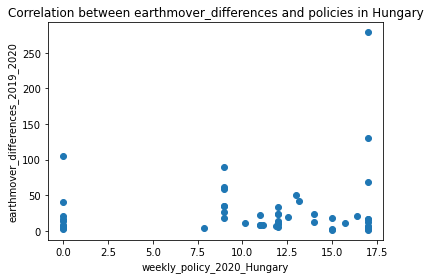

correlation and p_value are:  0.10210365032714627 0.4804567643549842


In [115]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_hungary_2019[i] and array_weekly_ratios_hungary_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_hungary_2019)) :
    earthmover_differences.append(wasserstein_distance(moving_average_weekly_ratios_hungary_2019[i], moving_average_weekly_ratios_hungary_2020[i]))


plt.scatter(weekly_ratio_policy_2020_hungary, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['movingAverage_originalvalues_earth']=corr




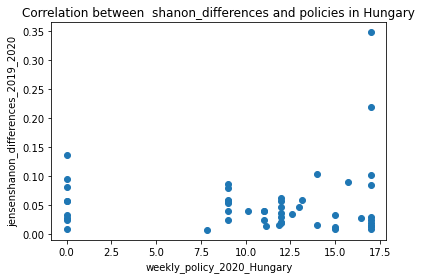

correlation and p_value are:  0.07076046952988602 0.6253305612791665


In [116]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_hungary_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(moving_average_weekly_ratios_hungary_2019[i], moving_average_weekly_ratios_hungary_2020[i]))
    
plt.scatter(weekly_ratio_policy_2020_hungary, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)
jensen_correlations['movingAverage_originalvalues_jensesn']=corr



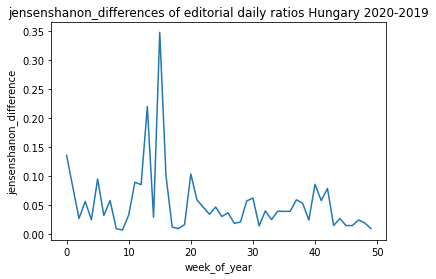

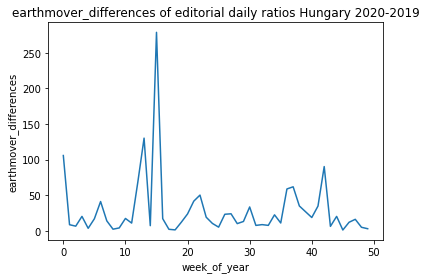

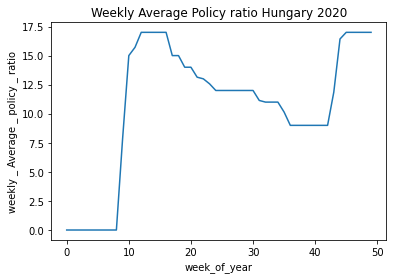

In [117]:


plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Hungary 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_hungary)
plt.title('Weekly Average Policy ratio Hungary 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

### 3.4 Testing other measures of difference: Kullback-Leiber divergence

In [118]:
"""
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

kl_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_hungary_2019)) :
    kl_differences.append(kl_divergence(array_weekly_ratios_hungary_2019[i], array_weekly_ratios_hungary_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_hungary, kl_differences) 
plt.title('Correlation between Kullback_Leiber_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('Kullback_Leiber_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_hungary)
print("correlation and p_value are: ", corr, p_value)
"""


'\ndef kl_divergence(p, q):\n    return np.sum(np.where(p != 0, p * np.log(p / q), 0))\n\nkl_differences= []\n\n#print(extracted_daily_ratio_2020[1])\n\n\nfor i in range(len(array_weekly_ratios_hungary_2019)) :\n    kl_differences.append(kl_divergence(array_weekly_ratios_hungary_2019[i], array_weekly_ratios_hungary_2020[i]))\n    \n\nplt.scatter(weekly_ratio_policy_2020_hungary, kl_differences) \nplt.title(\'Correlation between Kullback_Leiber_differences and policies in Hungary\')\nplt.xlabel(\'weekly_policy_2020_Hungary\')\nplt.ylabel(\'Kullback_Leiber_differences_2019_2020\')\nplt.show()\n\n\n\ncorr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_hungary)\nprint("correlation and p_value are: ", corr, p_value)\n'

## 3.5 Feature importance - feature selection - dimensionality reduction
Which policy indicators have the highest correlation with the editorial data?
Let's first look at correlations

In [119]:

# make up a new dataset consisting of IV and DV - add the earthmover as a column to the policy data set  


edit_and_policy= weekly_policy_2020_hungary_indicators_ratio
edit_and_policy['jensenshanon_differences']=jensenshanon_differences
edit_and_policy['earthmover_differences']=earthmover_differences


edit_and_policy.head(10)


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
week_of_year,,,,,,,,,,,
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.135502,105.907216
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.080852,8.785939
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.026639,6.749141
5,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.056100,20.473225
6,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.024341,3.732675
7,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.094729,17.132302
8,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.031773,41.319588
9,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.057527,14.174828
10,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.009016,2.502577


## 3.5.1  Correlation Heatmap

In [120]:
corr = edit_and_policy.corr()
corr.style.background_gradient(cmap ='coolwarm')


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
weekly_school,1.000000,0.857575,0.895861,0.312204,0.801808,0.818309,0.771816,0.683951,0.907089,0.157601,0.125346
weekly_workplace,0.857575,1.000000,0.948730,0.518784,0.788338,0.827115,0.471429,0.776999,0.937438,0.099899,0.123431
weekly_events,0.895861,0.948730,1.000000,0.492103,0.754998,0.827640,0.521032,0.787795,0.944286,0.089324,0.118700
weekly_gatherings,0.312204,0.518784,0.492103,1.000000,0.356391,0.491073,-0.171688,0.694966,0.638686,-0.272013,-0.151334
weekly_transportation,0.801808,0.788338,0.754998,0.356391,1.000000,0.817480,0.542277,0.457840,0.787256,0.064812,0.037109
weekly_home,0.818309,0.827115,0.827640,0.491073,0.817480,1.000000,0.559530,0.560348,0.868138,0.088523,0.066573
weekly_movement,0.771816,0.471429,0.521032,-0.171688,0.542277,0.559530,1.000000,0.345922,0.555267,0.391692,0.295407
weekly_travel,0.683951,0.776999,0.787795,0.694966,0.457840,0.560348,0.345922,1.000000,0.869713,0.040239,0.129484
weekly_sum,0.907089,0.937438,0.944286,0.638686,0.787256,0.868138,0.555267,0.869713,1.000000,0.070760,0.102104
jensenshanon_differences,0.157601,0.099899,0.089324,-0.272013,0.064812,0.088523,0.391692,0.040239,0.070760,1.000000,0.887211


In [121]:
df_final=weekly_policy_2020_hungary_indicators_ratio.iloc[:,:8]
df_final.head()

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
week_of_year,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


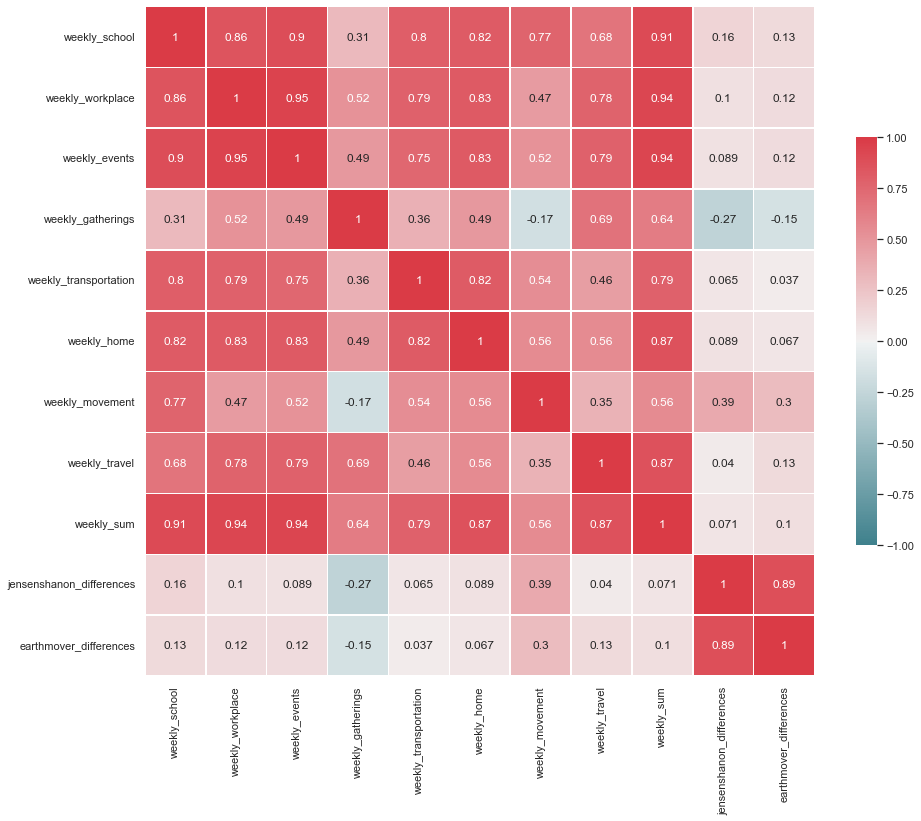

In [122]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(210, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Pairwise correlations larger than 0.75

In [123]:
correlated_features = set()
dict_correlated_features = {}

correlation_matrix = corr  # let's drop the target value

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75: #threshhold is 0.8 or can be lower
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
            dict_correlated_features[correlation_matrix.columns[i]]=correlation_matrix.columns[j]
            

In [124]:
print( "These questions highly correlated with each other ")
correlated_features
dict_correlated_features

These questions highly correlated with each other 


{'earthmover_differences': 'jensenshanon_differences',
 'weekly_events': 'weekly_workplace',
 'weekly_home': 'weekly_transportation',
 'weekly_movement': 'weekly_school',
 'weekly_sum': 'weekly_travel',
 'weekly_transportation': 'weekly_events',
 'weekly_travel': 'weekly_events',
 'weekly_workplace': 'weekly_school'}

In [125]:

# Displaying the dictionary 
for key, value in dict_correlated_features.items(): 
    
    question1= key 
    question2= value 
    
    print('Q: {}, Q: {}'.format(question1, question2)) 


Q: weekly_workplace, Q: weekly_school
Q: weekly_events, Q: weekly_workplace
Q: weekly_transportation, Q: weekly_events
Q: weekly_home, Q: weekly_transportation
Q: weekly_movement, Q: weekly_school
Q: weekly_travel, Q: weekly_events
Q: weekly_sum, Q: weekly_travel
Q: earthmover_differences, Q: jensenshanon_differences


## Jensen shanon correaltions plot

In [126]:


label_correlation = corr.sort_values(by='jensenshanon_differences', ascending=False)[['jensenshanon_differences']]
label_correlation = label_correlation.reset_index()
label_correlation.columns = ['Attribute', 'CorrelationWithjensenshanondifferences']
label_correlation = label_correlation.iloc[1: , :]
label_correlation = label_correlation.reset_index()
label_correlation.head()


,index,Attribute,CorrelationWithjensenshanondifferences
0,1,earthmover_differences,0.887211
1,2,weekly_movement,0.391692
2,3,weekly_school,0.157601
3,4,weekly_workplace,0.099899
4,5,weekly_events,0.089324


In [127]:


label_correlation['color']='NAN' # create new column

for i in range (label_correlation.shape[0]):
    
    #label_correlation.questions[i]= str(label_correlation.Attribute[i])+": "+questions_dict[label_correlation.Attribute[i]]
    
    if (label_correlation.CorrelationWithjensenshanondifferences[i]<0):
        label_correlation.color[i] = "red"
    else:
        label_correlation.color[i] = "blue"

    

print(label_correlation.nlargest(10,'CorrelationWithjensenshanondifferences'))  #print 10 best features 



   index               Attribute  CorrelationWithjensenshanondifferences color
0      1  earthmover_differences                                0.887211  blue
1      2         weekly_movement                                0.391692  blue
2      3           weekly_school                                0.157601  blue
3      4        weekly_workplace                                0.099899  blue
4      5           weekly_events                                0.089324  blue
5      6             weekly_home                                0.088523  blue
6      7              weekly_sum                                0.070760  blue
7      8   weekly_transportation                                0.064812  blue
8      9           weekly_travel                                0.040239  blue
9     10       weekly_gatherings                               -0.272013   red


/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


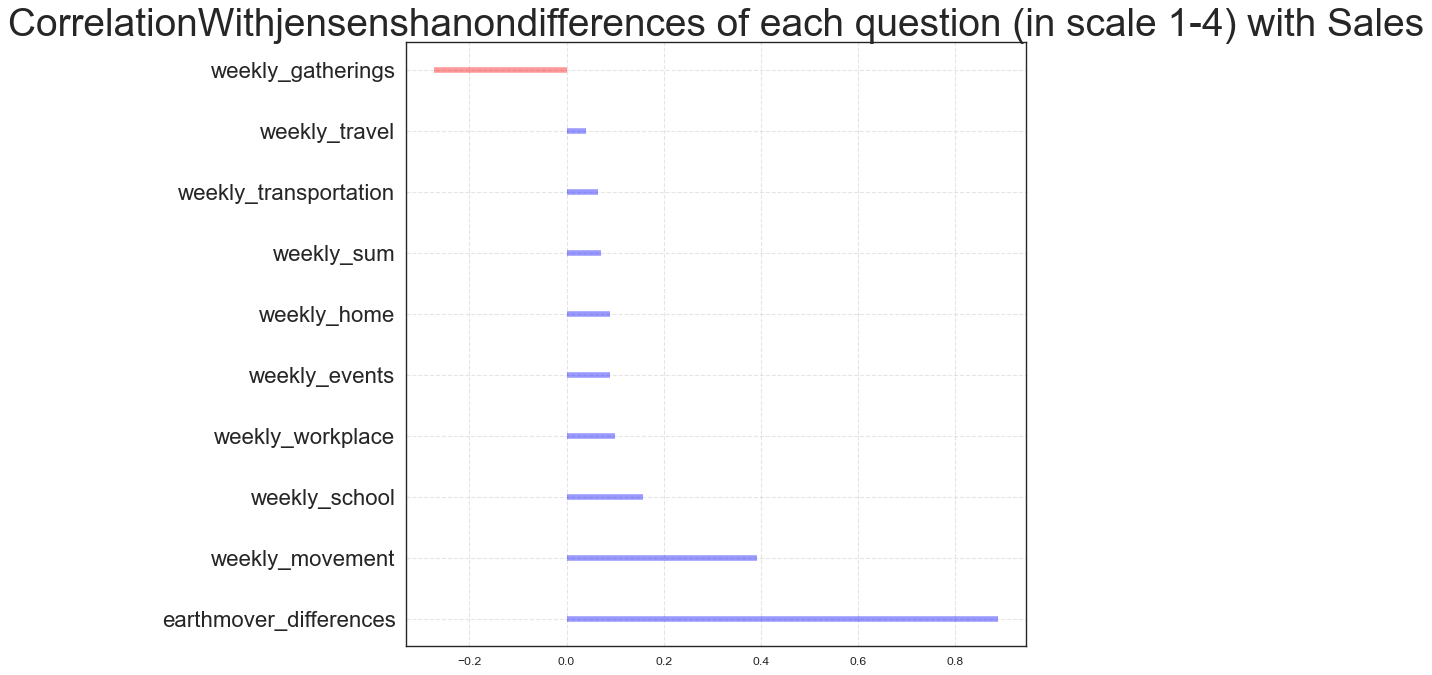

In [128]:
#label_correlation.sort_values("CorrelationWithPC1", inplace=True)

# Draw plot
plt.figure(figsize=(10, 10), dpi=80)
  
# Plotting the horizontal lines
plt.hlines(y=label_correlation.Attribute, xmin=0, xmax=label_correlation.CorrelationWithjensenshanondifferences,color=label_correlation.color,
          alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(label_correlation.Attribute, fontsize=20)
  
# Title of Bar Chart
plt.title('CorrelationWithjensenshanondifferences of each question (in scale 1-4) with Sales', fontdict={
          'size': 35})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

## Earthmover correaltions plot

In [129]:

label_correlation = corr.sort_values(by='earthmover_differences', ascending=False)[['earthmover_differences']]
label_correlation = label_correlation.reset_index()
label_correlation.columns = ['Attribute', 'CorrelationWithearthmoverdifferences']
label_correlation = label_correlation.iloc[1: , :]
label_correlation = label_correlation.reset_index()
label_correlation.head()




label_correlation['color']='NAN'

for i in range (label_correlation.shape[0]):
    
    #label_correlation.questions[i]= str(label_correlation.Attribute[i])+": "+questions_dict[label_correlation.Attribute[i]]
    
    if (label_correlation.CorrelationWithearthmoverdifferences[i]<0):
        label_correlation.color[i] = "red"
    else:
        label_correlation.color[i] = "blue"

print(label_correlation.nlargest(10,'CorrelationWithearthmoverdifferences'))  #print 10 best features 




   index                 Attribute  CorrelationWithearthmoverdifferences color
0      1  jensenshanon_differences                              0.887211  blue
1      2           weekly_movement                              0.295407  blue
2      3             weekly_travel                              0.129484  blue
3      4             weekly_school                              0.125346  blue
4      5          weekly_workplace                              0.123431  blue
5      6             weekly_events                              0.118700  blue
6      7                weekly_sum                              0.102104  blue
7      8               weekly_home                              0.066573  blue
8      9     weekly_transportation                              0.037109  blue
9     10         weekly_gatherings                             -0.151334   red


/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


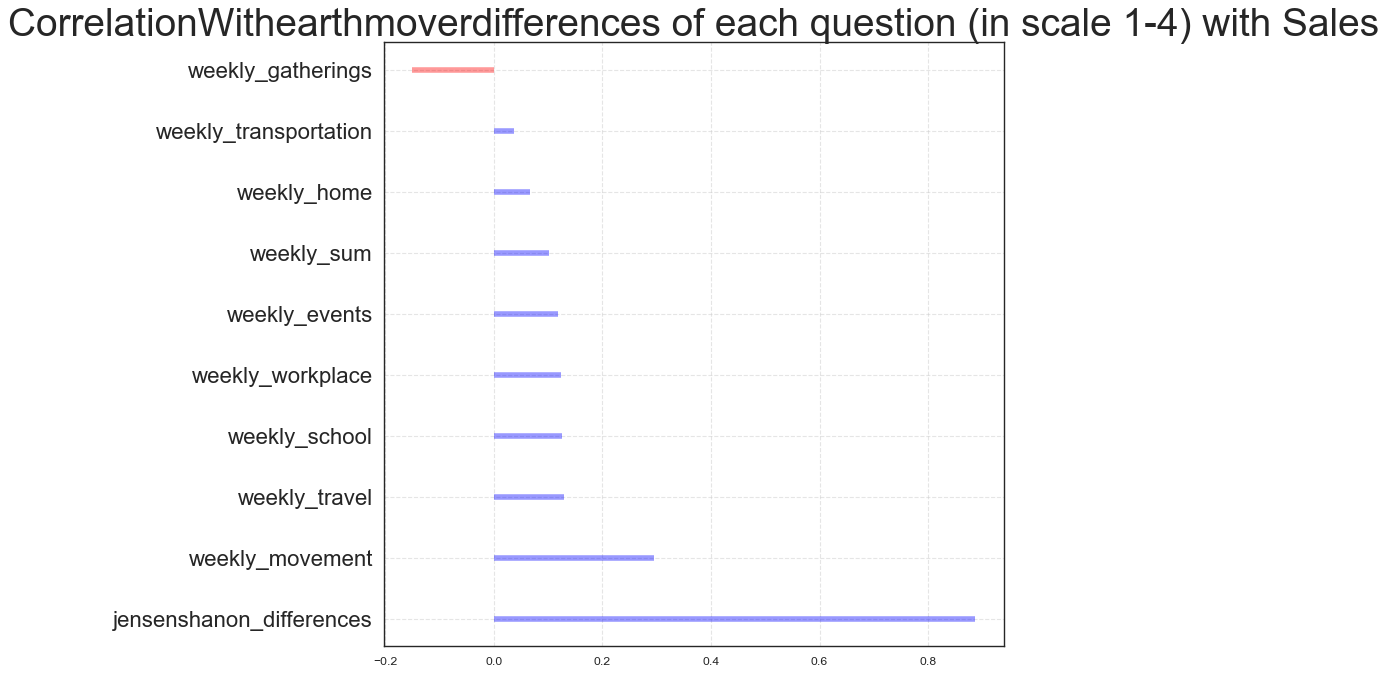

In [130]:


#label_correlation.sort_values("CorrelationWithPC1", inplace=True)

# Draw plot
plt.figure(figsize=(10, 10), dpi=80)
  
# Plotting the horizontal lines
plt.hlines(y=label_correlation.Attribute, xmin=0, xmax=label_correlation.CorrelationWithearthmoverdifferences,color=label_correlation.color,
          alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(label_correlation.Attribute, fontsize=20)
  
# Title of Bar Chart
plt.title('CorrelationWithearthmoverdifferences of each question (in scale 1-4) with Sales', fontdict={
          'size': 35})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

## 3.5.2 PCA

### 3.5.2.1 PCA calclations using the built in library

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardizing the features
x = StandardScaler().fit_transform(df_final)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf
 

,principal component 1,principal component 2
0,4.126546,-0.645862
1,4.126546,-0.645862
2,4.126546,-0.645862
3,4.126546,-0.645862
4,4.126546,-0.645862
5,4.126546,-0.645862
6,4.126546,-0.645862
7,4.126546,-0.645862
8,4.126546,-0.645862
9,1.334153,-0.449947


### Explained variance by the first and second PC

In [132]:
pca.explained_variance_ratio_


array([0.69325482, 0.17036701])

In [133]:
PC1=list(principalDf.iloc[:,0])

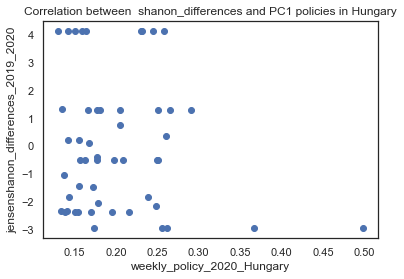

correlation and p_value are:  -0.1364240710683922 0.34481642520885414


In [134]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_hungary_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_hungary_2019[i], array_weekly_ratios_hungary_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and PC1 policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['PC1_basic_jensen']=corr



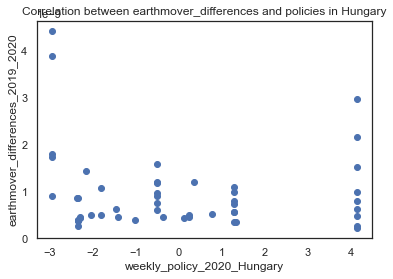

correlation and p_value are:  -0.10537420120073987 0.46643393423695395


In [135]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_hungary_2019[i] and array_weekly_ratios_hungary_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_hungary_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_hungary_2019_weeklyyearlynorm[i], array_weekly_ratios_hungary_2020_weeklyyearlynorm[i]))


plt.scatter(PC1, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, PC1)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['PC1_basic_earth']=corr



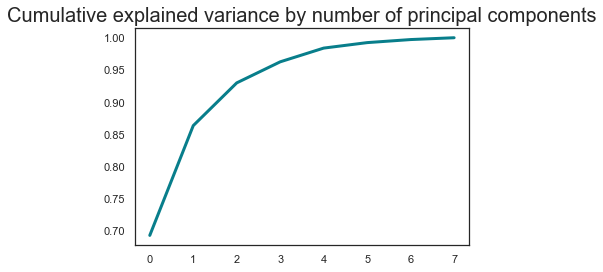

In [136]:


pca = PCA().fit(StandardScaler().fit_transform(df_final))

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [137]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(df_final.columns) + 1)],
    index=df_final.columns
)
loadings.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
weekly_school,-0.951310,-0.252934,0.095165,-0.001173,0.031912,-0.179681,-0.070734,-0.063854
weekly_workplace,-0.959923,0.088731,-0.014005,0.247747,-0.043537,0.108993,-0.122471,0.027096
weekly_events,-0.966034,0.045850,0.062647,0.217169,-0.103597,-0.088933,0.104766,0.066182
weekly_gatherings,-0.544273,0.801890,-0.073556,-0.257880,0.040483,-0.054506,-0.039333,0.055473
weekly_transportation,-0.856895,-0.169024,-0.418047,0.020762,0.281380,0.034357,0.044522,-0.006229
weekly_home,-0.910896,-0.052318,-0.285190,-0.171550,-0.265005,0.058277,0.030621,-0.051133
weekly_movement,-0.626733,-0.703863,0.251655,-0.248364,0.024820,0.045736,-0.010209,0.066053
weekly_travel,-0.804071,0.383461,0.451090,-0.014931,0.092283,0.087923,0.056472,-0.060784


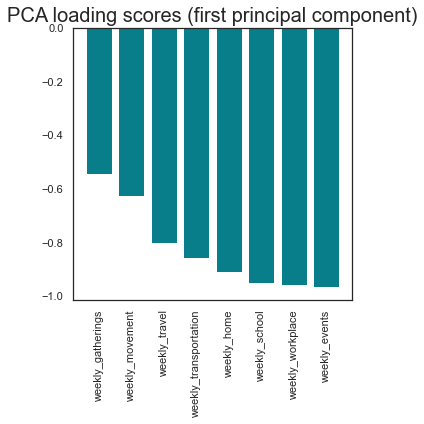

In [138]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']


f, ax = plt.subplots(figsize=(5, 5))


plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [139]:

pc1_loadings['color']='NAN'
for i in range (pc1_loadings .shape[0]):
    
    if (pc1_loadings.CorrelationWithPC1[i]<0):
        pc1_loadings.color[i] = "red"
    else:
        pc1_loadings.color[i] = "blue"

    

print(pc1_loadings .nlargest(10,'CorrelationWithPC1'))  #print 10 best features 




               Attribute  CorrelationWithPC1 color
0      weekly_gatherings           -0.544273   red
1        weekly_movement           -0.626733   red
2          weekly_travel           -0.804071   red
3  weekly_transportation           -0.856895   red
4            weekly_home           -0.910896   red
5          weekly_school           -0.951310   red
6       weekly_workplace           -0.959923   red
7          weekly_events           -0.966034   red


/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


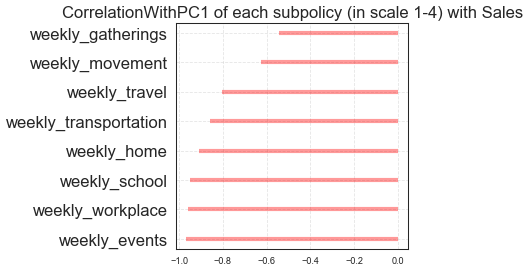

In [140]:
pc1_loadings.sort_values("CorrelationWithPC1", inplace=True)

# Draw plot
plt.figure(figsize=(5, 5), dpi=60)
  
# Plotting the horizontal lines
plt.hlines(y=pc1_loadings.Attribute, xmin=0, xmax=pc1_loadings.CorrelationWithPC1,color=pc1_loadings.color,
          alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(pc1_loadings.Attribute, fontsize=20)
  
# Title of Bar Chart
plt.title('CorrelationWithPC1 of each subpolicy (in scale 1-4) with Sales', fontdict={
          'size': 20})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

### 3.5.2.2 PCA calculations manually 

In [141]:

#1
df2_meaned=df_final.apply(lambda x:x-x.mean())
df2_meaned
#2 covariance
cov_mat =df2_meaned.cov()
cov_mat

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
weekly_school,1.041366,0.660192,0.664490,0.366880,0.406181,0.646347,0.522382,1.013844
weekly_workplace,0.660192,0.569105,0.520217,0.450679,0.295227,0.482957,0.235877,0.851454
weekly_events,0.664490,0.520217,0.528313,0.411895,0.272420,0.465623,0.251179,0.831770
weekly_gatherings,0.366880,0.450679,0.411895,1.326081,0.203732,0.437701,-0.131129,1.162499
weekly_transportation,0.406181,0.295227,0.272420,0.203732,0.246431,0.314102,0.178542,0.330146
weekly_home,0.646347,0.482957,0.465623,0.437701,0.314102,0.599092,0.287239,0.630012
weekly_movement,0.522382,0.235877,0.251179,-0.131129,0.178542,0.287239,0.439892,0.333269
weekly_travel,1.013844,0.851454,0.831770,1.162499,0.330146,0.630012,0.333269,2.110029


In [142]:
eig_value, eig_vectors =np.linalg.eig(cov_mat)
#eig_vectors
sorted_index =np.argsort(eig_value)[::-1]
sorted_eigenvalue=eig_value[sorted_index]
sorted_eigenvector= eig_vectors[:,sorted_index]

In [143]:
n_components=2
eig_vector_subset=sorted_eigenvector[:,0:n_components]
X_reduced=np.dot(eig_vector_subset.transpose(), df2_meaned.transpose()).transpose()
principal_df2_two_dim=pd.DataFrame(X_reduced, columns=['PC1','PC2'])
print(principal_df2_two_dim)


         PC1       PC2
0   4.246553  0.209701
1   4.246553  0.209701
2   4.246553  0.209701
3   4.246553  0.209701
4   4.246553  0.209701
5   4.246553  0.209701
6   4.246553  0.209701
7   4.246553  0.209701
8   4.246553  0.209701
9   0.856929  0.211765
10 -1.630559  1.147276
11 -1.794751  1.359524
12 -2.062041  1.792620
13 -2.062041  1.792620
14 -2.062041  1.792620
15 -2.062041  1.792620
16 -2.062041  1.792620
17 -1.301485  1.601206
18 -1.301485  1.601206
19 -1.015101  1.406157
20 -1.015101  1.406157
21 -0.671247  1.038421
22 -0.613938  0.977132
23 -0.503871  0.575797
24 -0.357116  0.040684
25 -0.357116  0.040684
26 -0.357116  0.040684
27 -0.357116  0.040684
28 -0.357116  0.040684
29 -0.357116  0.040684
30 -0.357116  0.040684
31 -0.218239 -0.101745
32 -0.195093 -0.125483
33 -0.195093 -0.125483
34 -0.378774 -0.715117
35 -0.224467 -1.089966
36  0.022094 -1.458734
37  0.022094 -1.458734
38  0.022094 -1.458734
39  0.022094 -1.458734
40  0.022094 -1.458734
41  0.022094 -1.458734
42  0.02209

In [144]:
principal_df2_two_dim.var()

PC1    4.779859
PC2    1.276843
dtype: float64

In [145]:
PC1=list(principal_df2_two_dim.iloc[:,0])

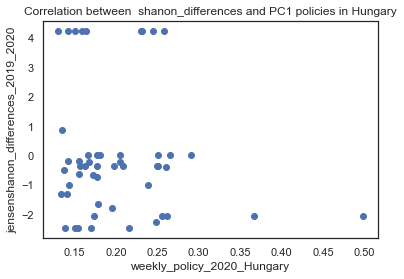

correlation and p_value are:  -0.13102974748894872 0.3644042583916374


In [146]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_hungary_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_hungary_2019[i], array_weekly_ratios_hungary_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and PC1 policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['PC1_basic_jensen']=corr





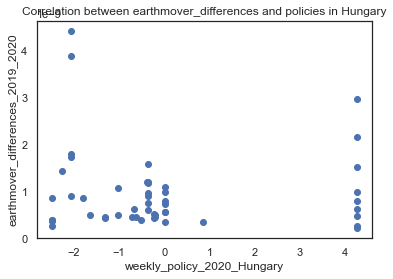

correlation and p_value are:  -0.022607307390156345 0.876163572074926


In [147]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_hungary_2019[i] and array_weekly_ratios_hungary_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_hungary_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_hungary_2019_weeklyyearlynorm[i], array_weekly_ratios_hungary_2020_weeklyyearlynorm[i]))


plt.scatter(PC1, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Hungary')
plt.xlabel('weekly_policy_2020_Hungary')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, PC1)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['PC1_basic_earth']=corr



### 4. Results

In [148]:
print( "EARTH MOVER:\n")
for key, value in earth_correlations.items():
    print(key, ' : ', value)
    
print("\n")
print( "JENSEN SHANON:\n")

for key, value in jensen_correlations.items():
    print(key, ' : ', value)


EARTH MOVER:

normalizedweekly_earth  :  0.062341008556214106
normalizedyearlyweekly_earth  :  0.07822437215975088
without_outlier10_earth  :  0.05789976445840286
normalizedyearlyweekly_without_outlier10_earth  :  0.0652024995195063
movingAverage_originalvalues_earth  :  0.10210365032714627
PC1_basic_earth  :  -0.022607307390156345


JENSEN SHANON:

normalizedweekly_jensen  :  0.08922423710757918
normalizedyearlyweekly_jensen  :  0.08922423710757911
without_outlier10_jensen  :  0.13500181228494235
normalizedyearlyweekly_without_outlier10_jensen  :  0.13496504886890207
movingAverage_originalvalues_jensesn  :  0.07076046952988602
PC1_basic_jensen  :  -0.13102974748894872
